In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import torch
import os
from sklearn import preprocessing
from sklearn.externals import joblib

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<font face="微软雅黑" size=6 color=#000000> 1. Import Data and Link sessions and tracks

In [2]:
# Import Data 
data_path = '/Users/cengqiqi/Desktop/project/data/'

track_features = pd.read_csv(data_path + 'tf_mini.csv')
sessions =pd.read_csv(data_path + 'log_mini.csv')

In [3]:
# Link sessions and tracks
sessions.rename(columns={'track_id_clean':'track_id'}, inplace = True)
sessions_new = pd.merge(left=sessions,right=track_features,how='left',on = 'track_id')

In [73]:
print('There are ', track_features.shape[0], 'tracks in total.')
print('There are ', sessions_new.shape[0], 'sessiono logs in total.')

There are  50704 tracks in total.
There are  167880 sessiono logs in total.


<font face="微软雅黑" size=6 color=#000000>  2. Track Analysis

In [4]:
track_features.shape


(50704, 30)

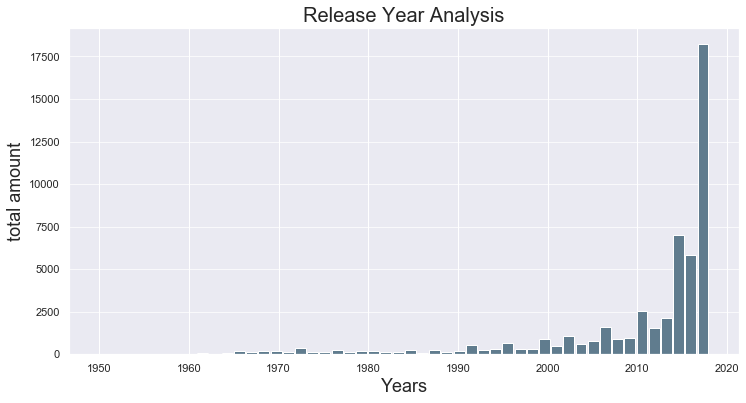

In [6]:
# the distribution of release year
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['release_year'].plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('Release Year Analysis',fontsize = 20)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_1_release_year_distributions.png'), format='png', dpi=300)

In [115]:
x = (track_features["release_year"]>=2010).sum()/50704
print('music library: ',x, 'of the tracks are released later than 2010')

# sampling for machine learning algorithm
x = (sessions_new["release_year"]>=2010).sum()/sessions_new.shape[0]
print('session log: ', x, 'of the tracks are released later than 2010')

print('ranging from', min(track_features["release_year"]), 'to', max(track_features["release_year"]))

music library:  0.7363521615651625 of the tracks are released later than 2010
session log:  0.8552716225875625 of the tracks are released later than 2010
ranging from 1950 to 2018


***********************************************************************************************
The songs which are more than 500 seconds:  369
***********************************************************************************************


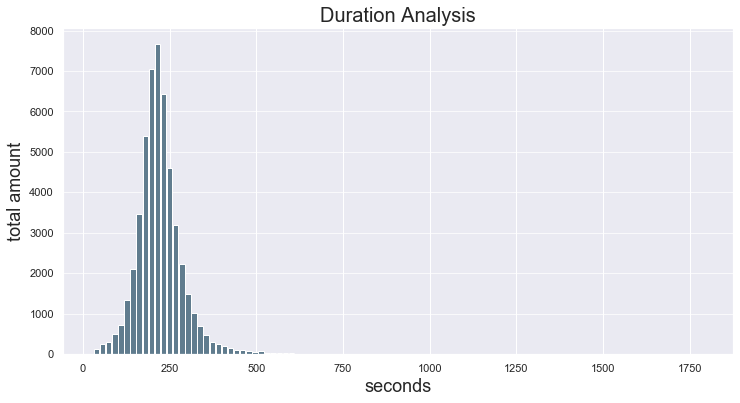

In [339]:
# the distribution of duration
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['duration'].plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('Duration Analysis',fontsize = 20)
plt.xlabel('seconds', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_2_duration_distributions.png'), format='png', dpi=300)

num_of_long_songs = track_features[track_features['duration']>500].count()['duration']
print('*'*95)
print('The number of songs which are more than 500 seconds: ', num_of_long_songs)
print('*'*95)

In [116]:
x = (track_features["duration"]<100).sum()
y = (track_features["duration"]>300).sum()

print('music library:', (50704-x-y)/50704, 'are last 100 to 300 seconds')


x = (sessions_new["duration"]<100).sum()
y = (sessions_new["duration"]>300).sum()
print('sessions log:', (sessions_new.shape[0]-x-y)/sessions_new.shape[0], 'have duration from 100 to 300 seconds')

print('ranging from', min(track_features["duration"]), 'to', max(track_features["duration"]))

music library: 0.8843483748816662 are last 100 to 300 seconds
sessions log: 0.9186383130807719 have duration from 100 to 300 seconds
ranging from 30.01333045959473 to 1787.760986328125


***********************************************************************************************
there are 17020 out of 167880 tracks estimated less than 99.5. 
there are 10442 out of 167880 tracks estimated less than 99. 
***********************************************************************************************


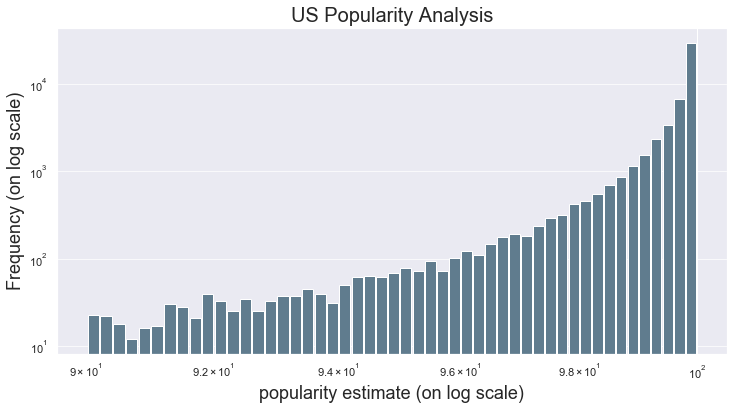

In [41]:
# analysis us_popularity_estimate
plt.figure(figsize=(12,6))
plt.xscale('log')
plt.yscale('log')
track_features['us_popularity_estimate'].plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('US Popularity Analysis',fontsize = 20)
plt.xlabel('popularity estimate (on log scale)', fontsize = 18)
plt.ylabel('Frequency (on log scale)', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_4_popularity_distributions.png'), format='png', dpi=300)

# find Minority Music
minority1= len(sessions_new.loc[sessions_new['us_popularity_estimate'] < 99.5])
minority2 = len(sessions_new.loc[sessions_new['us_popularity_estimate'] < 99])
print('*'*95)
print(f'there are {minority1} out of {len(sessions_new)} tracks estimated less than 99.5. ')
print(f'there are {minority2} out of {len(sessions_new)} tracks estimated less than 99. ')
print('*'*95)

In [120]:
x = (track_features[""]>=98).sum()/50704
print('music library', x, 'us_popularity_estimate more than 98')

x = (sessions_new["us_popularity_estimate"]>=98).sum()/sessions_new.shape[0]
print('sessions log:',x, 'us_popularity_estimate more than 98')


max(track_features["us_popularity_estimate"])

print('ranging from', min(track_features["us_popularity_estimate"]), 'to', max(track_features["us_popularity_estimate"]))

music library 0.9312677500788893 us_popularity_estimate more than 98
sessions log: 0.9641589230402668 us_popularity_estimate more than 98
ranging from 90.01889950112628 to 99.99999678325527


In [ ]:
x = (track_features["release_year"]>=2010).sum()/50704
print(x of the tracks are released later than 2010)

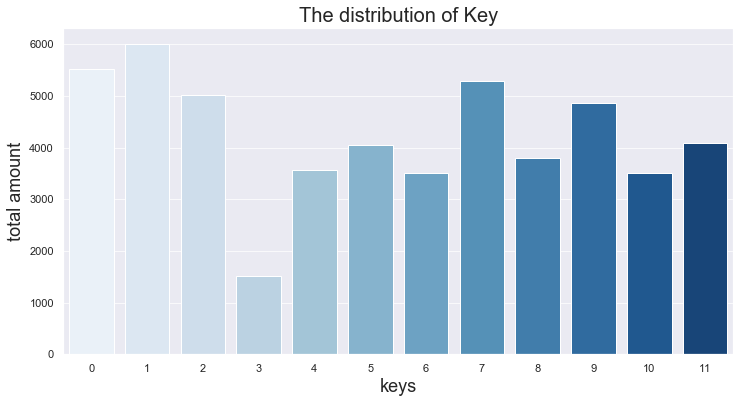

In [341]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='key',data=track_features, palette="Blues")
plt.title('The distribution of Key',fontsize = 20)
plt.xlabel('keys', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_5_key_distributions.png'), format='png', dpi=300)

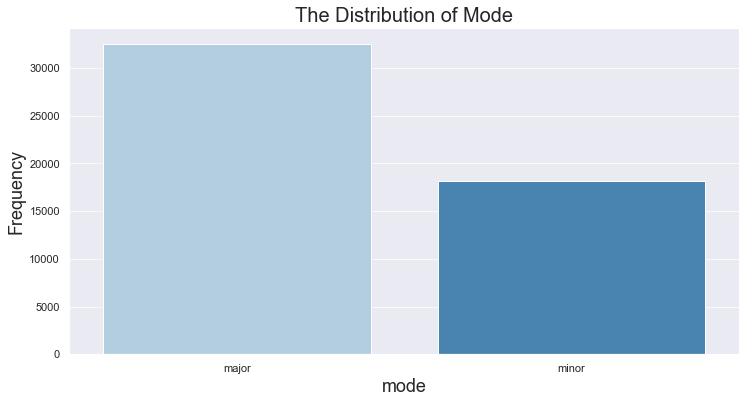

In [342]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='mode',data=track_features, palette="Blues")
plt.title('The Distribution of Mode',fontsize = 20)
plt.xlabel('mode', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_6_mode_distributions.png'), format='png', dpi=300)

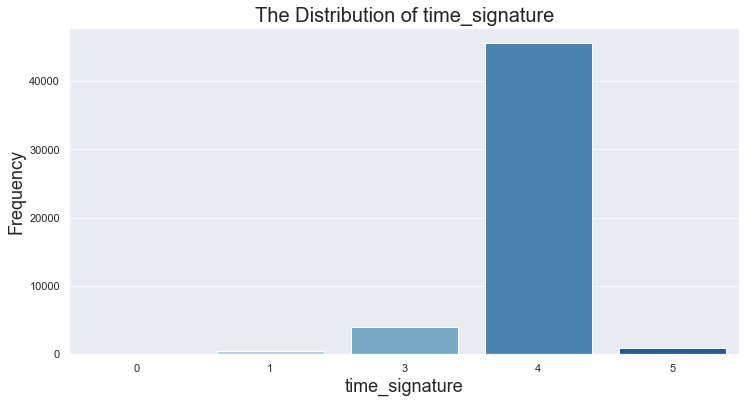

In [343]:
# the distribution of key
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
sns.countplot(x='time_signature',data=track_features, palette="Blues")
plt.title('The Distribution of time_signature',fontsize = 20)
plt.xlabel('time_signature', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_7_time_signature_distributions.png'), format='png', dpi=300)

In [70]:
track_features["time_signature"]==4

0         True
1        False
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10       False
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18       False
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28       False
29        True
         ...  
50674     True
50675     True
50676     True
50677     True
50678     True
50679    False
50680     True
50681     True
50682     True
50683     True
50684     True
50685     True
50686     True
50687     True
50688     True
50689     True
50690    False
50691    False
50692    False
50693     True
50694     True
50695     True
50696     True
50697     True
50698     True
50699     True
50700     True
50701     True
50702     True
50703     True
Name: time_signature, Length: 50704, dtype: bool

In [71]:
x = (track_features["time_signature"]==4).sum()/50704
print('music library', x, 'us_popularity_estimate more than 96')

x = (sessions_new["time_signature"]==4).sum()/sessions_new.shape[0]
print('sessions log:',x, 'us_popularity_estimate more than 96')

music library 0.8977792679078573 us_popularity_estimate more than 96
sessions log: 0.9357934238741958 us_popularity_estimate more than 96


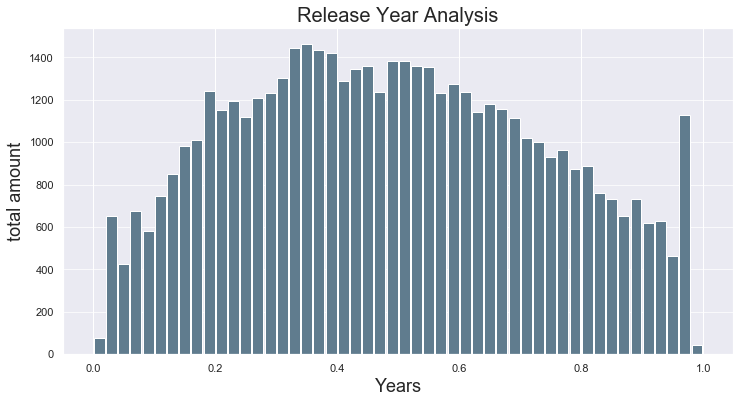

In [261]:
# the distribution of release year
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['valence'].plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('Release Year Analysis',fontsize = 20)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_1_release_year_distributions.png'), format='png', dpi=300)

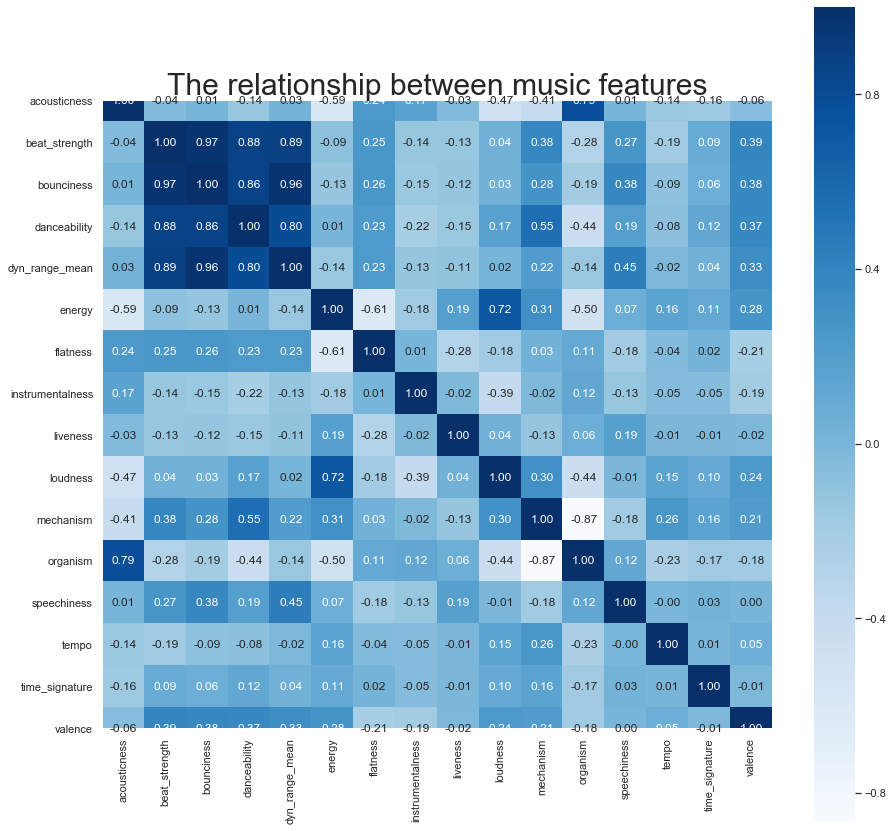

In [89]:
feature_correlation= track_features[['acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence']].corr()

plt.subplots(figsize=(15, 15))
sns.heatmap(feature_correlation, annot=True, vmax=1, square=True, fmt='.2f', annot_kws={'size': 12},  cmap="Blues")
plt.title('The relationship between music features',fontsize = 30)
plt.savefig(os.path.join('figures/tracks_features', 'tf_8_music_features.png'), format='png', dpi=300)

Text(0.5, 1, 'The relationship between acoustics')

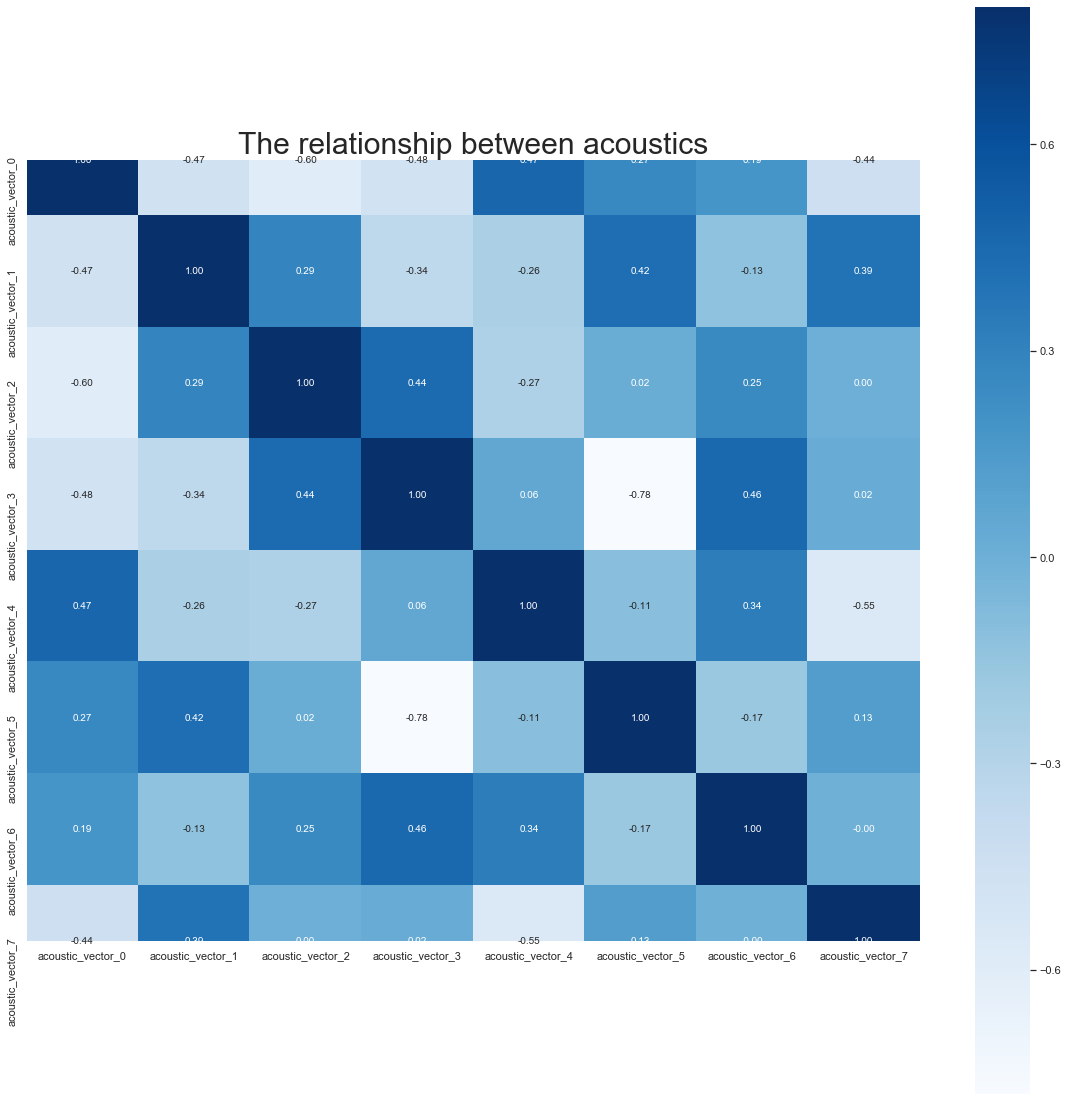

In [345]:
feature_correlation= track_features[['acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']].corr()

plt.subplots(figsize=(20, 20))
sns.heatmap(feature_correlation, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10},  cmap="Blues")
plt.title('The relationship between acoustics', fontsize = 30)

<font face="微软雅黑" size=6 color=#000000>  3. session analysis

In [66]:
# sampling for machine learning algorithm
x = (sessions_new["release_year"]>=2010).sum()/sessions_new.shape[0]
print(x, 'of the tracks are released later than 2010')

x = (sessions_new["duration"]<100).sum()
y = (sessions_new["duration"]>300).sum()
print((sessions_new.shape[0]-x-y)/sessions_new.shape[0], 'have duration from 100 to 300 seconds')

# 
x = (sessions_new["us_popularity_estimate"]>=96).sum()/sessions_new.shape[0]
print(x, 'us_popularity_estimate more than 96')

0.8552716225875625 of the tracks are released later than 2010
0.9186383130807719 have duration from 100 to 300 seconds
0.986168691922802 us_popularity_estimate more than 96


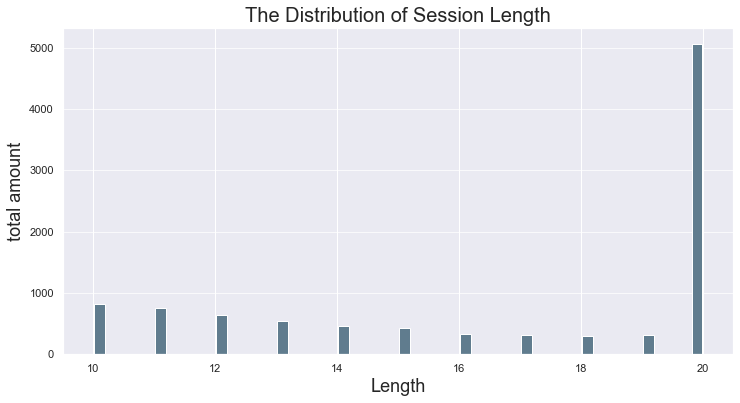

In [125]:
#group = sessions_new.groupby('session_id')
grouped = sessions_new['session_length'].groupby(sessions_new['session_id'])
length_array = grouped.mean()

# the distribution of session length
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
length_array.plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('The Distribution of Session Length',fontsize = 20)
plt.xlabel('Length', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/sessions', 'tf_1_release_year_distributions.png'), format='png', dpi=300)


In [129]:
x = (length_array==20).sum()/10000
print(x, 'has 20 tracks in a session')

0.5066 has 20 tracks in a session


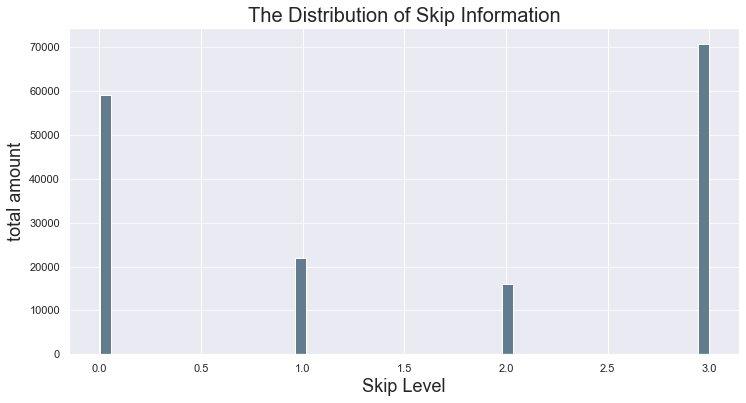

In [132]:
skip_total = sessions_new[['skip_1','skip_2','skip_3']].sum(axis = 1)

# the distribution of session length
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
skip_total.plot.hist(grid=True, bins=50, rwidth=0.9, color='#607c8e')
plt.title('The Distribution of Skip Information',fontsize = 20)
plt.xlabel('Skip Level', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/sessions', 'skip_info_distributions.png'), format='png', dpi=300)

In [151]:
x = (skip_total==0).sum()
y = (skip_total==3).sum()
z = ((skip_total == 2).sum() + (skip_total == 1).sum())
print(x, ' were not skipped by users')
print(y, ' were skipped by users at beginning')
print(z, 'were partially skipped')

59029  were not skipped by users
70762  were skipped by users at beginning
38089 were partially skipped


The correlation between skip and context_switch is  -0.04905894477292282


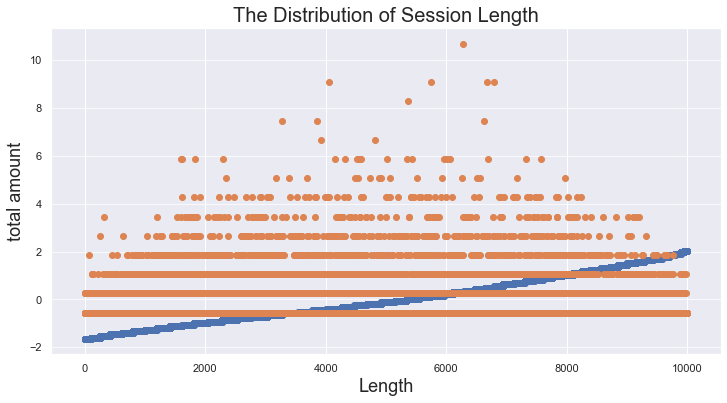

In [347]:
# the relationship between skip behaviour and context_switch

# process skip (add all the skips together)

# grouped = sessions_new[['skip_1','skip_2','skip_3','not_skipped']].groupby(sessions_new['session_id'])
# grouped.sum() # skip_3 + not_skipped ! = sessions length?

grouped_skip = sessions_new[['skip_1','skip_2','skip_3']].groupby(sessions_new['session_id'])
total_skip = pd.DataFrame(grouped_skip.sum()).sum(axis=1)

mean_skip = np.mean(total_skip)
std_skip = np.std(total_skip)
skip_line= (total_skip-mean_skip)/std_skip


# process context_switch
grouped_switch = sessions_new['context_switch'].groupby(sessions_new['session_id'])
total_switch = grouped_swsitch.sum()

mean_switch = np.mean(total_switch)
std_switch = np.std(total_switch)
switch_line= (total_switch-mean_switch)/std_switch


# correlation
corr_ = total_skip.corr(total_switch)
print('The correlation between skip and context_switch is ', corr_)

# plot (skip_line in ascending order)
s_c = pd.concat([skip_line, switch_line], axis=1).reset_index()
s_c_sorted = s_c.sort_values(0)

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(range(len(s_c_sorted[0])),s_c_sorted[0].values)
plt.scatter(range(len(s_c_sorted['context_switch'])),s_c_sorted['context_switch'].values)

plt.title('The Distribution of Session Length',fontsize = 20)
plt.xlabel('Length', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

In [348]:
# the relationship between hist_user_behavior_n_seekfwd, hist_user_behavior_n_seekback and skip
skip_total = sessions_new[['skip_1','skip_2','skip_3']].sum(axis = 1)
corr_1 = skip_total.corr(sessions_new['hist_user_behavior_n_seekfwd'])
corr_2 = skip_total.corr(sessions_new['hist_user_behavior_n_seekback'])

print('*'*95)
print('The correlation between hist_user_behavior_n_seekfwd and skip number is ', corr_1)
print('The correlation between hist_user_behavior_n_seekback and skip number is ', corr_2)
print('*'*95)

***********************************************************************************************
The correlation between hist_user_behavior_n_seekfwd and skip number is  0.002331981424965397
The correlation between hist_user_behavior_n_seekback and skip number is  -0.04043819310440463
***********************************************************************************************


In [349]:
# the premium analysis

# the percentage of premium
per = sessions_new['premium'].sum()/len(sessions_new)
print('*'*95)
print('The the percentage of premium is ', per)
print('*'*95)

# the probability of skip
pre = sessions_new.loc[sessions_new['premium'] == True]
notPre = sessions_new.loc[sessions_new['premium'] == False]

skip_probability_1 = pre[['skip_1','skip_2','skip_3']].sum().sum()/3/len(pre)
skip_probability_2 = notPre[['skip_1','skip_2','skip_3']].sum().sum()/3/len(notPre)

print(' ')
print('*'*95)
print('The average probability of a premium to skip a track is ', skip_probability_1)
print('The average probability of a non-premium to skip a track is ', skip_probability_2)
print('*'*95)



***********************************************************************************************
The the percentage of premium is  0.8104181558255897
***********************************************************************************************
 
***********************************************************************************************
The average probability of a premium to skip a track is  0.525216888516485
The average probability of a non-premium to skip a track is  0.5452812601459976
***********************************************************************************************


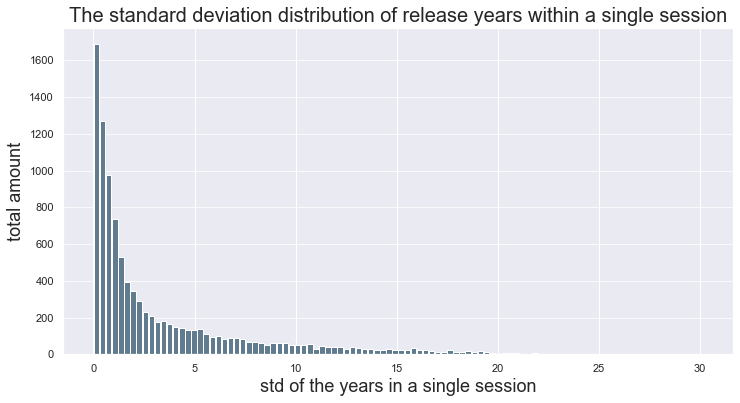

In [265]:
# the std of relase year within a session 
# this result shows that users tends to listening to songs from the same generation
grouped_year = sessions_new['release_year'].groupby(sessions_new['session_id'])
std_year = grouped_year.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_year.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The standard deviation distribution of release years within a single session',fontsize = 20)
plt.xlabel('std of the years in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/sessions', 'year_std_for_all.png'), format='png', dpi=300)

In [239]:
sessions_id_include_old = []
for i in range(len(sessions_new['us_popularity_estimate'])):
    if sessions_new['release_year'][i]<2010:
        sessions_id_include_old.append(sessions_new['session_id'][i])
sessions_id_include_old =  np.unique(sessions_id_include_old) 

session_id_check = []
for session_id in sessions_new['session_id']:
    session_id_check.append(session_id in sessions_id_include_old)
    
sessions_include_old = sessions_new[session_id_check]

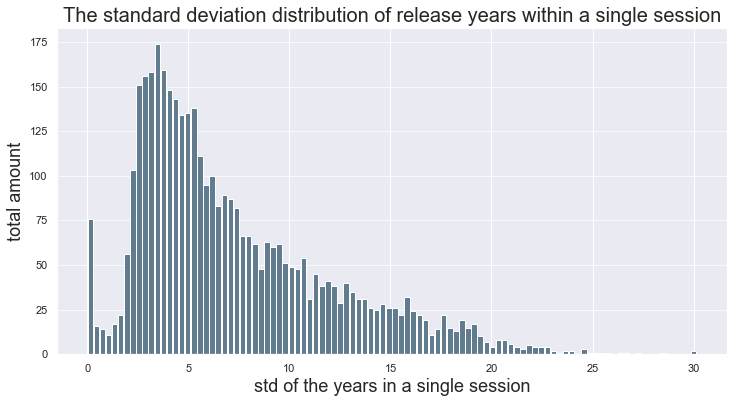

In [267]:
# the popuarity of us_popularity_estimate within a session (std) 

grouped_year = sessions_include_old['release_year'].groupby(sessions_new['session_id'])
std_year = grouped_year.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_year.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The standard deviation distribution of release years within a single session',fontsize = 20)
plt.xlabel('std of the years in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/sessions', 'year_std_for_old.png'), format='png', dpi=300)

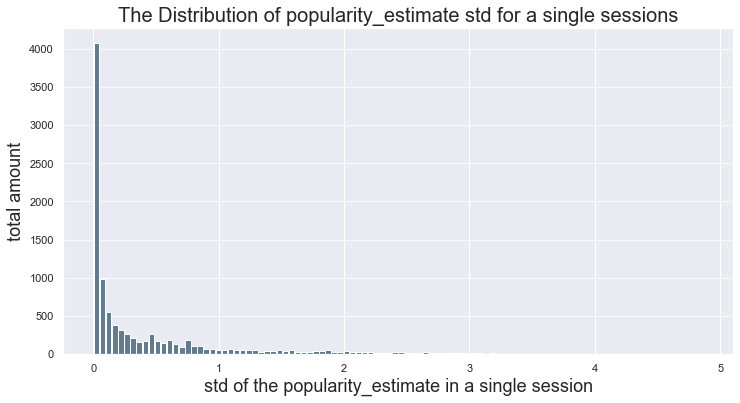

In [263]:
grouped_p = sessions_new['us_popularity_estimate'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The Distribution of popularity_estimate std for a single sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join('figures/sessions', 'popularity_std_for_all.png'), format='png', dpi=300)

In [262]:
std_p.max()

4.861654464878473

In [243]:
sessions_id_include_minor = []
for i in range(len(sessions_new['us_popularity_estimate'])):
    if sessions_new['us_popularity_estimate'][i]<98:
        sessions_id_include_minor.append(sessions_new['session_id'][i])
sessions_id_include_minor =  np.unique(sessions_id_include_minor) 

session_id_check = []
for session_id in sessions_new['session_id']:
    session_id_check.append(session_id in sessions_id_include_minor)
    
sessions_include_minor = sessions_new[session_id_check]

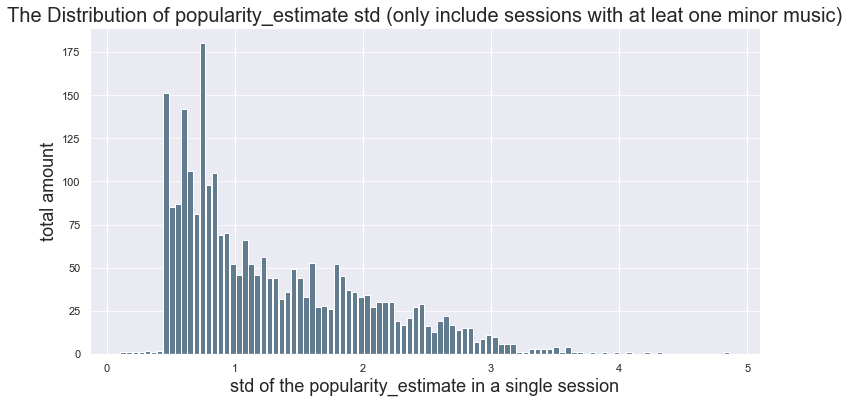

In [264]:
grouped_p = sessions_include_minor['us_popularity_estimate'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The Distribution of popularity_estimate std (only include sessions with at leat one minor music)',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join('figures/sessions', 'popularity_std_for_minor.png'), format='png', dpi=300)

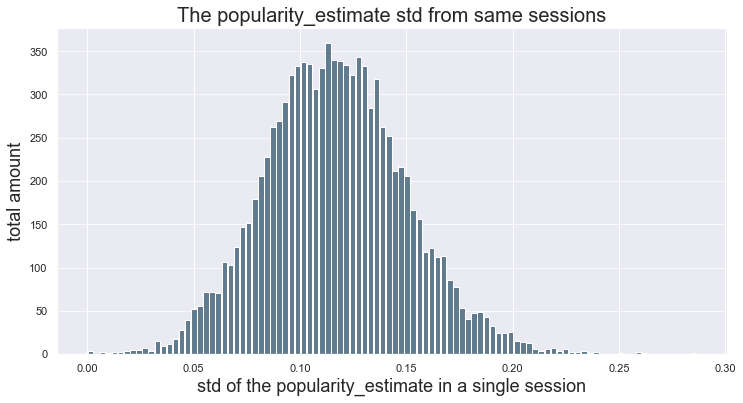

In [352]:
# the music style analysis 1

grouped_p = sessions_new['beat_strength'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the beat_strength in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

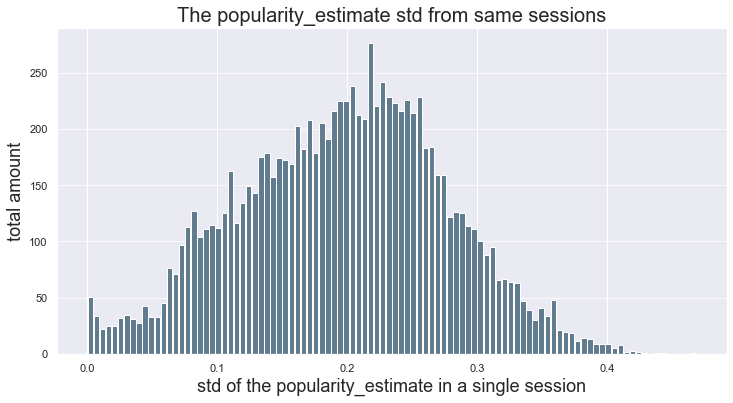

In [353]:
# the music style analysis 2

grouped_p = sessions_new['acousticness'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The acousticness std from same sessions',fontsize = 20)
plt.xlabel('std of the popularity_estimate in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

***********************************************************************************************
This result shows that users have strong preference in instrumentalness.
***********************************************************************************************
***********************************************************************************************
This result shows that users have strong preference in instrumentalness.
***********************************************************************************************


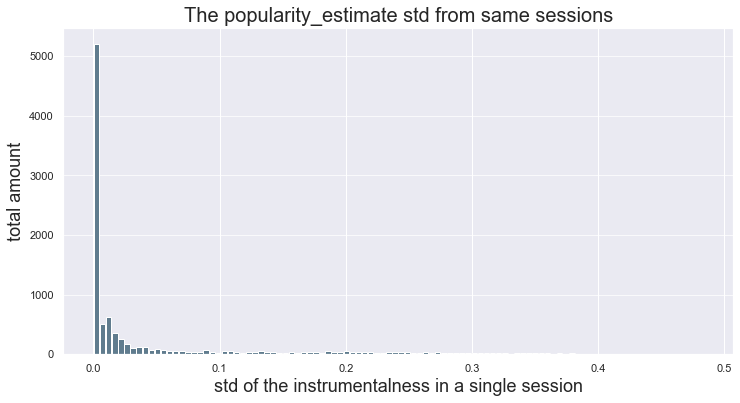

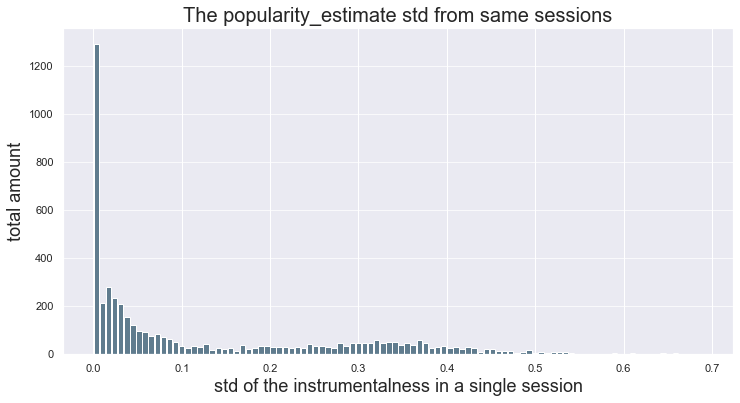

In [108]:
# the music style analysis 3

grouped_p = sessions_new['instrumentalness'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the instrumentalness in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

print('*'*95)
print('This result shows that users have strong preference in instrumentalness.')
print('*'*95)

#minority
minority2= sessions_new.loc[sessions_new['instrumentalness'] > 0.002]
grouped_p = minority2['instrumentalness'].groupby(sessions_new['session_id'])
std_p = grouped_p.std()

plt.figure(figsize=(12,6))
sns.set(color_codes=True)
std_p.plot.hist(grid=True, bins=100, rwidth=0.9, color='#607c8e')
plt.title('The popularity_estimate std from same sessions',fontsize = 20)
plt.xlabel('std of the instrumentalness in a single session', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

print('*'*95)
print('This result shows that users have strong preference in instrumentalness.')
print('*'*95)

In [104]:
x = (track_features["instrumentalness"]<=0.002).sum()/50704
print('music library: ',x, "of the tracks' instrumentalness are released less than 0.002")

# sampling for machine learning algorithm
x = (sessions_new["instrumentalness"]<=0.002).sum()/sessions_new.shape[0]
print('session log: ', x, "of the tracks' instrumentalness are released less than 0.002")

music library:  0.781989586620385 of the tracks' instrumentalness are released less than 0.002
session log:  0.849922563736002 of the tracks' instrumentalness are released less than 0.002


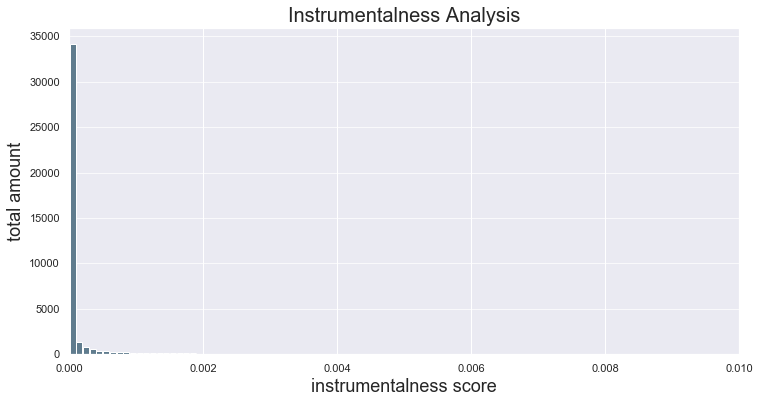

In [101]:
plt.figure(figsize=(12,6))
sns.set(color_codes=True)
track_features['instrumentalness'].plot.hist(grid=True, bins=10000, rwidth=0.9, color='#607c8e')

plt.xlim((0, 0.01))
plt.title('Instrumentalness Analysis',fontsize = 20)
plt.xlabel('instrumentalness score', fontsize = 18)
plt.ylabel('total amount', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

plt.savefig(os.path.join('figures/tracks_features', 'tf_1_instrumentalness_distributions.png'), format='png', dpi=300)

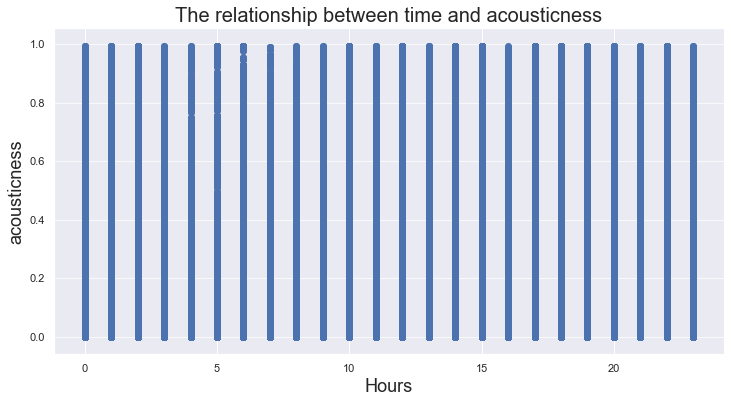

In [355]:
# the relationship between hour_of_day and music style 1
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['acousticness'])

plt.title('The relationship between time and acousticness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('acousticness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

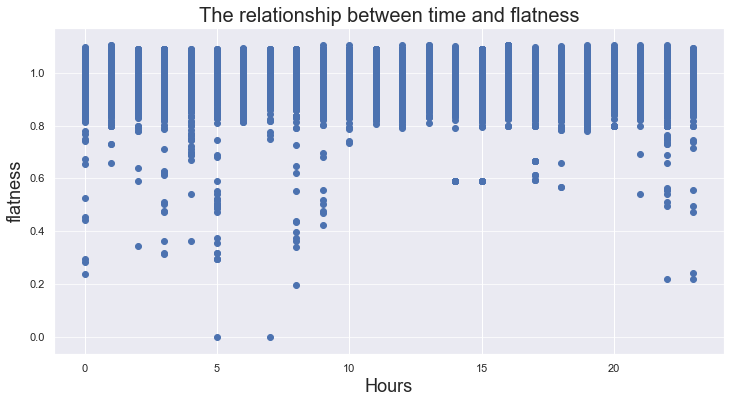

In [356]:
# the relationship between hour_of_day and music style 2
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['flatness'])

plt.title('The relationship between time and flatness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('flatness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)

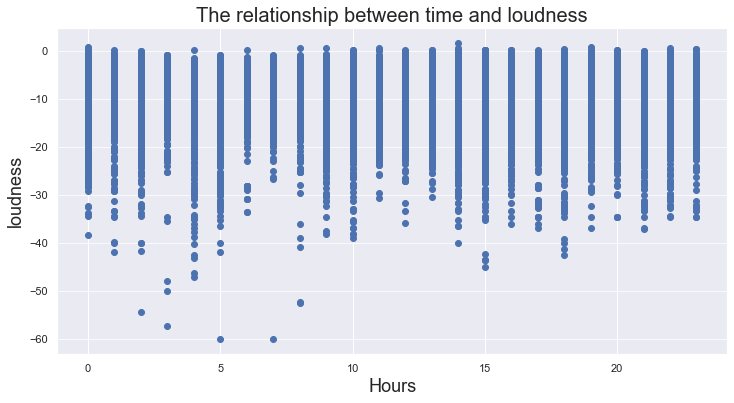

In [357]:
# the relationship between hour_of_day and music style 3
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['loudness'])

plt.title('The relationship between time and loudness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('loudness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)


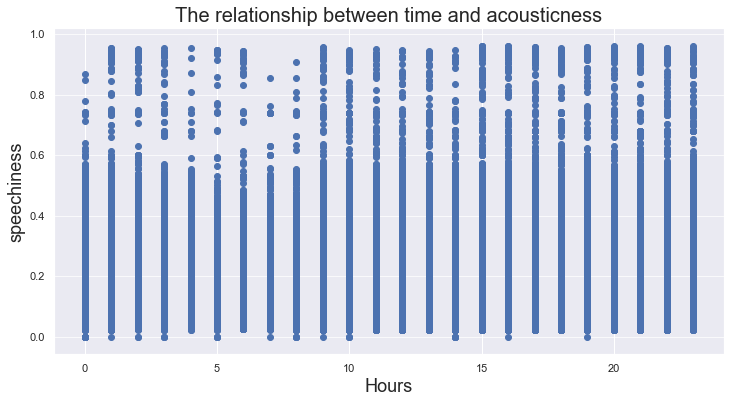

In [359]:
sessions_new_sorted =sessions_new.sort_values('hour_of_day')

plt.figure(figsize=(12,6))
sns.set(color_codes=True)

plt.scatter(sessions_new_sorted['hour_of_day'], sessions_new_sorted['speechiness'])

plt.title('The relationship between time and acousticness',fontsize = 20)
plt.xlabel('Hours', fontsize = 18)
plt.ylabel('speechiness', fontsize = 18)
plt.grid(axis='y', alpha=0.75)